**профили компактности**


доля соседей объекта принадлежащих другому классу


Евгений Борисов esborisov@sevsu.ru

---

In [11]:
import numpy as np
from numpy import  random as rng

In [32]:
n = 150 # количество примеров в одном классе

data = [ # датасеты разной степени смешения 
    np.vstack([ rng.rand(n,2)+[0,0.0], rng.rand(n,2)+[0,0.1] ]), 
    np.vstack([ rng.rand(n,2)+[0,0.0], rng.rand(n,2)+[0,0.6] ]), 
    np.vstack([ rng.rand(n,2)+[0,0.0], rng.rand(n,2)+[0,1.0] ]), 
    np.vstack([ rng.rand(n,2)+[0,0.0], rng.rand(n,2)+[0,2.0] ]), 
]

target = [ np.array([0]*n+[1]*n) ] * len(data) # метки объектов датасетов

display( data[0].shape, target[0].shape )

(300, 2)

(300,)

---

In [14]:
from sklearn.metrics.pairwise import euclidean_distances

In [15]:
# профиль компактности
def compact_profile(X,y,metric=euclidean_distances):
    r = metric(X) # матрица расстояний
    ri = np.argsort(r) # номера соседей в порядке увеличения расстояния 
    nc = y[ ri.flatten() ].reshape(r.shape) # номера классов для соседей в порядке увеличения расстояния 
    # инвертируем метку класса 1 для подсчёта точек-соседей из чужих классов
    nc = np.vstack([ (nc[ nc[:,0]==1 ]-1)*-1, nc[ nc[:,0]==0 ] ])
    # считаем чужих соседей k-тых в очереди удаления от объекта
    pc = np.asarray([ nc[:,k].sum() for k in range(1,nc.shape[1]) ])
    return pc/pc.max()

---

In [ ]:
import matplotlib.pyplot as plt

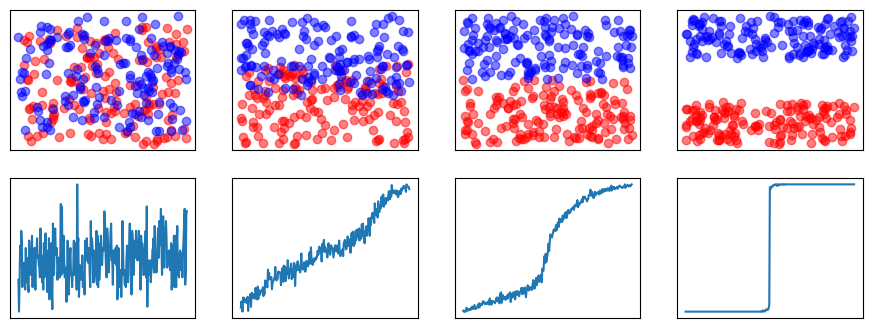

In [38]:
fig,ax = plt.subplots(2,len(data),sharey=False,sharex=False,figsize=(11,4),)
for i,(x,t) in enumerate(zip(data,target)):
    ax[0][i].scatter(x=x[t==0,0],y=x[t==0,1],alpha=.5,c='r')
    ax[0][i].scatter(x=x[t==1,0],y=x[t==1,1],alpha=.5,c='b')
    ax[1][i].plot( compact_profile(x,t) ) 
    ax[0][i].set_xticks([])
    ax[0][i].set_yticks([])
    
    ax[1][i].set_xticks([])
    ax[1][i].set_yticks([])
    # ax[1][i].grid()